In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
fooddata = pd.read_csv("data/EDA_Trial3.csv", encoding='latin1')

In [4]:
fooddata = fooddata.dropna()
fooddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3115 entries, 0 to 3142
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3115 non-null   int64  
 1   State                  3115 non-null   object 
 2   County                 3115 non-null   object 
 3   PCT_DIABETES_ADULTS13  3115 non-null   float64
 4   POVRATE15              3115 non-null   float64
 5   CHILDPOVRATE15         3115 non-null   float64
 6   MEDHHINC15             3115 non-null   float64
 7   PCT_LACCESS_LOWI10     3115 non-null   float64
 8   PCT_LACCESS_LOWI15     3115 non-null   float64
 9   PCT_DIABETES_ADULTS08  3115 non-null   float64
 10  GROCPTH11              3115 non-null   float64
 11  GROCPTH16              3115 non-null   float64
 12  FFRPTH11               3115 non-null   float64
 13  FFRPTH16               3115 non-null   float64
 14  FOODINSEC_12_14        3115 non-null   float64
 15  FOODINSEC

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
food_train, food_test = train_test_split(fooddata,
                                            test_size=.2,
                                            random_state=440,
                                            shuffle=True)

In [7]:
food_train['log_medhhinc'] = np.log10(food_train['MEDHHINC15'])

In [8]:
northeast = ['PA', 'NJ', 'NY', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME']

southeast = ['WV', 'VA', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'DE', 'MD', 'AR', 'LA', 'OK', 'TX']

midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH']

west = ['WA', 'OR', 'CA', 'AK', 'HI', 'ID', 'NV', 'AZ', 'UT', 'CO', 'NM', 'WY', 'MT']



In [9]:
food_train['region'] = 1

In [10]:
food_train.loc[food_train['State'].isin(northeast), 'region'] = 'NE'
food_train.loc[food_train['State'].isin(southeast), 'region'] = 'SE'
food_train.loc[food_train['State'].isin(midwest), 'region'] = 'MW'
food_train.loc[food_train['State'].isin(west), 'region'] = 'W'

C:\Users\squis\AppData\Local\Temp\ipykernel_35964\4277407805.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NE' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  food_train.loc[food_train['State'].isin(northeast), 'region'] = 'NE'


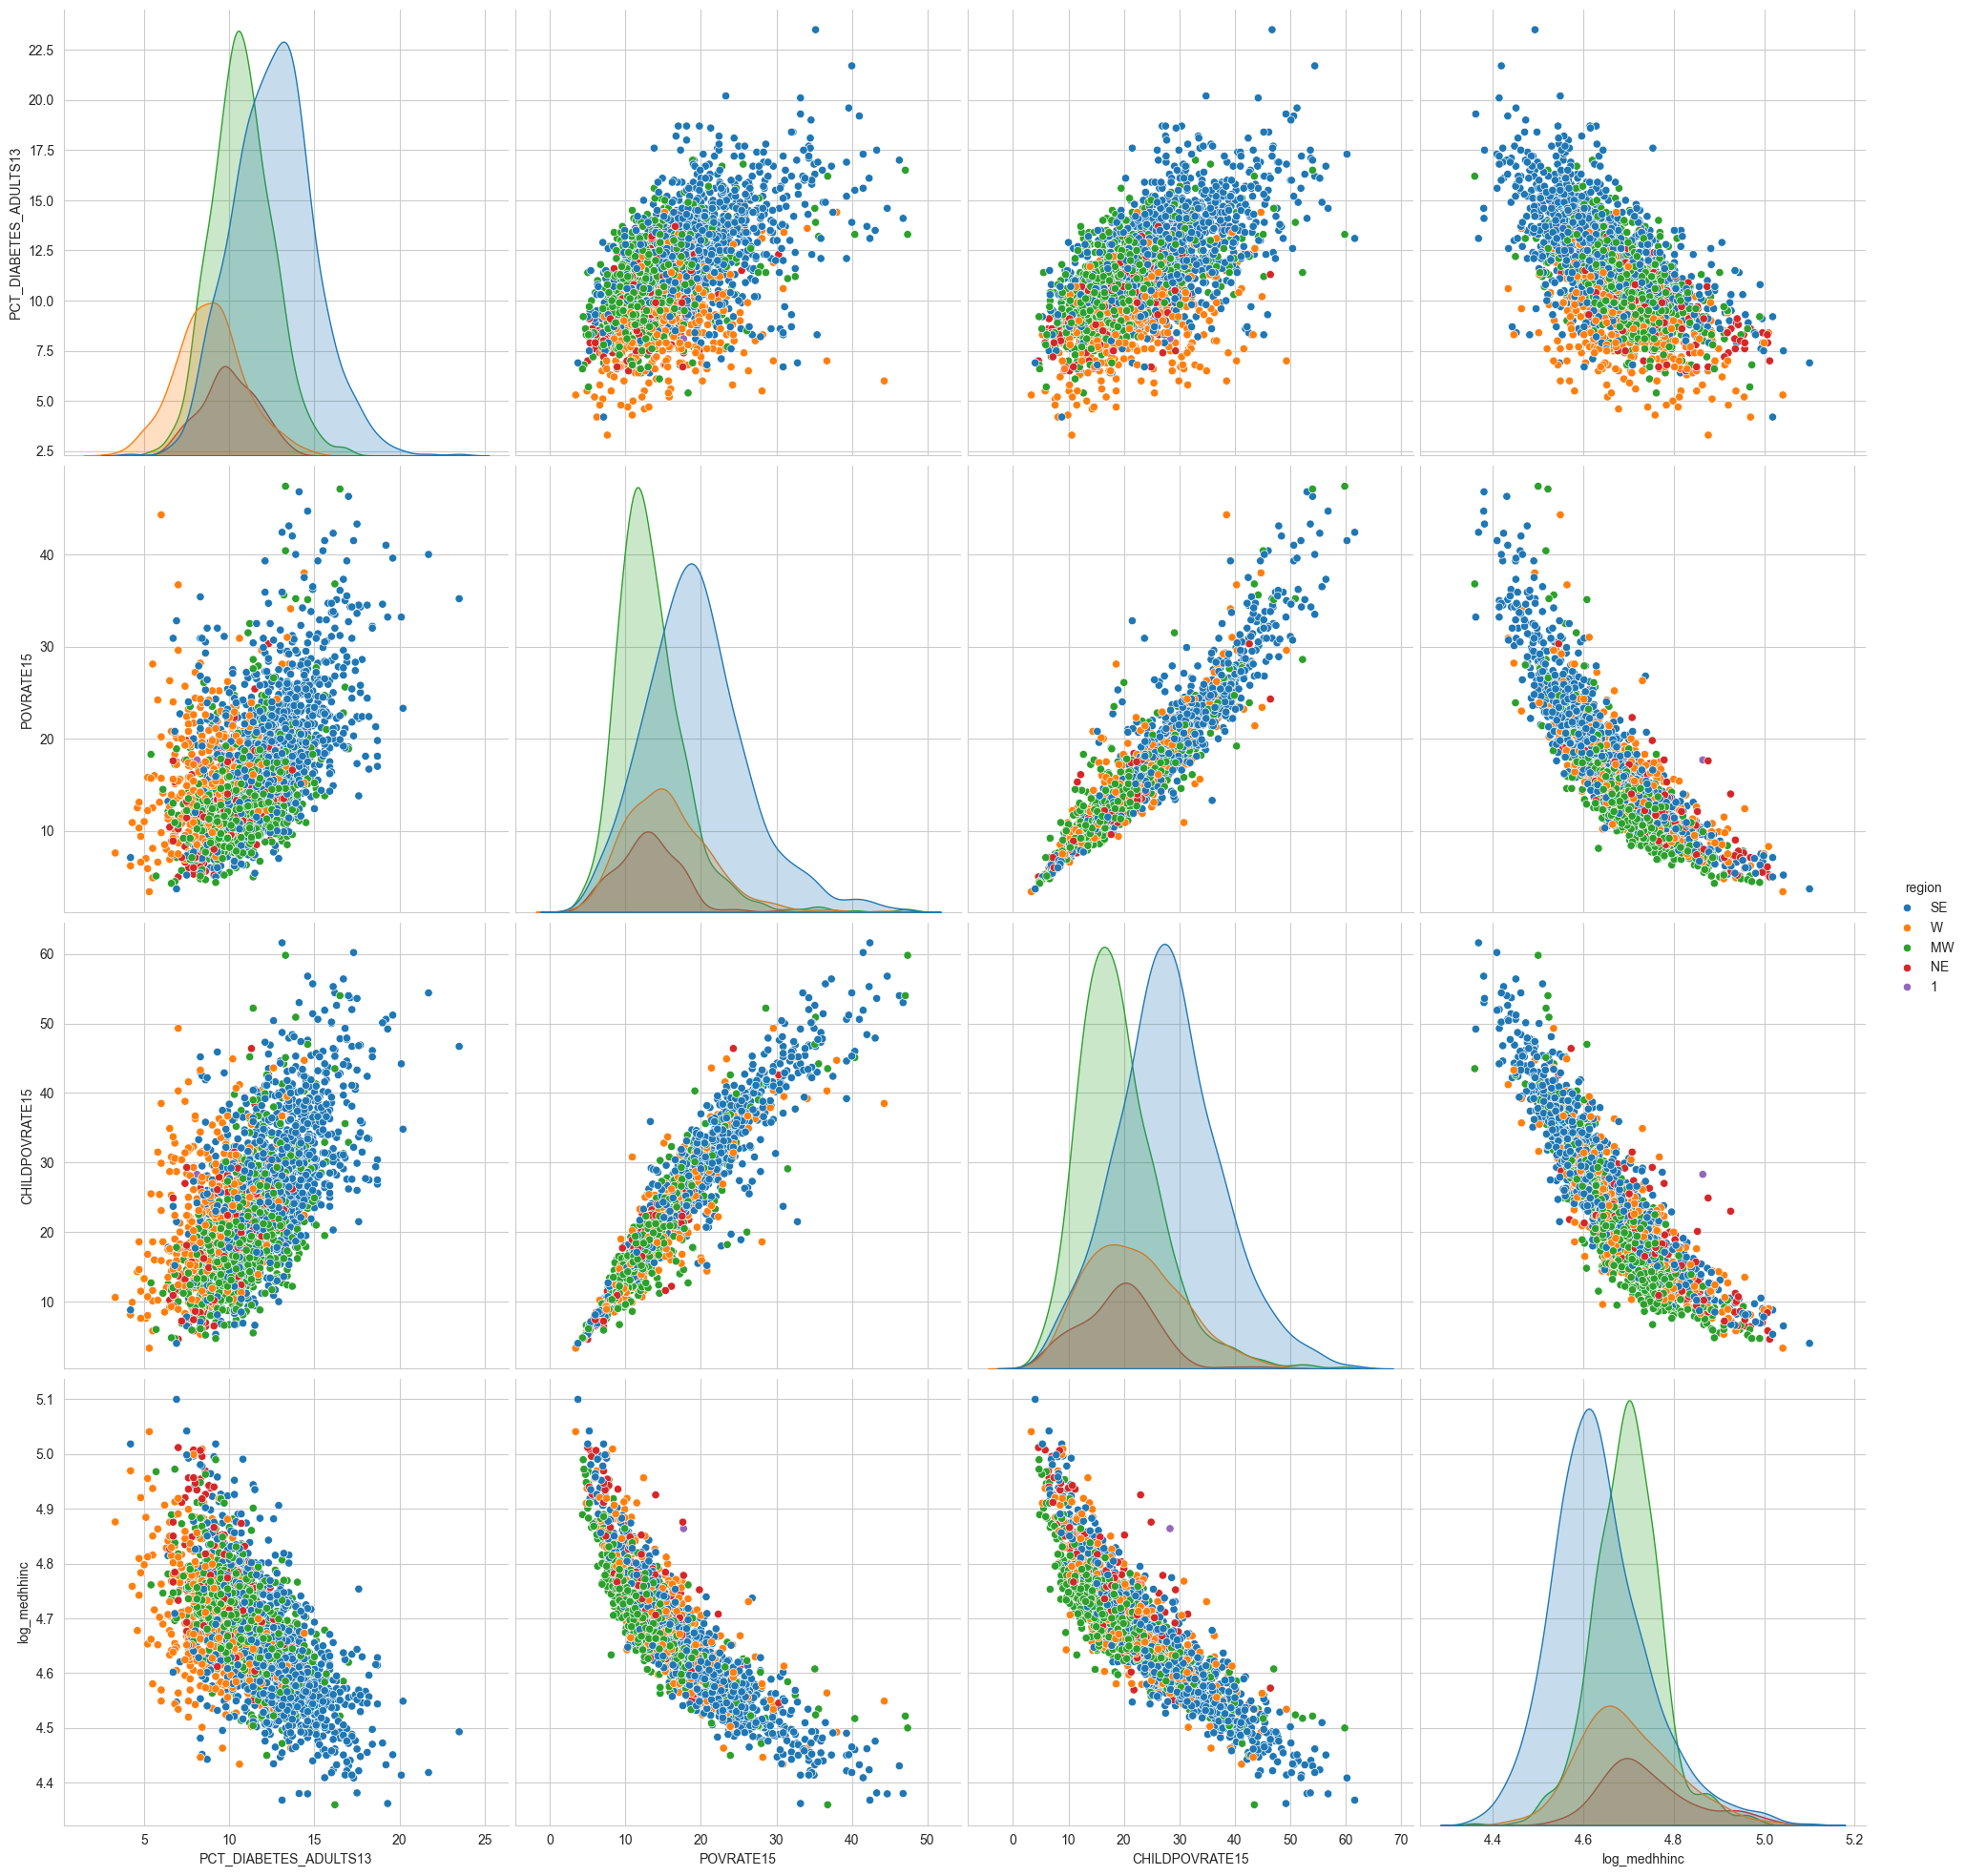

In [11]:
sns.pairplot(food_train,
                y_vars = ['PCT_DIABETES_ADULTS13', 'POVRATE15', 'CHILDPOVRATE15', 'log_medhhinc'],
                x_vars = ['PCT_DIABETES_ADULTS13','POVRATE15', 'CHILDPOVRATE15', 'log_medhhinc',],
                height = 5,
                hue = 'region')

plt.show()

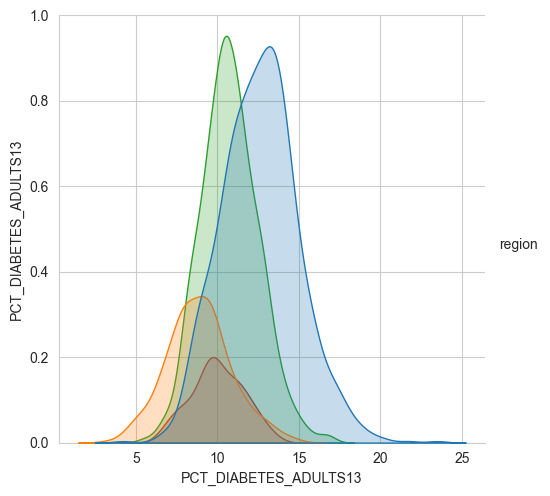

In [12]:
sns.pairplot(food_train,
                y_vars = ['PCT_DIABETES_ADULTS13'],
                x_vars = ['PCT_DIABETES_ADULTS13'],
                height = 5,
                hue = 'region')

plt.show()

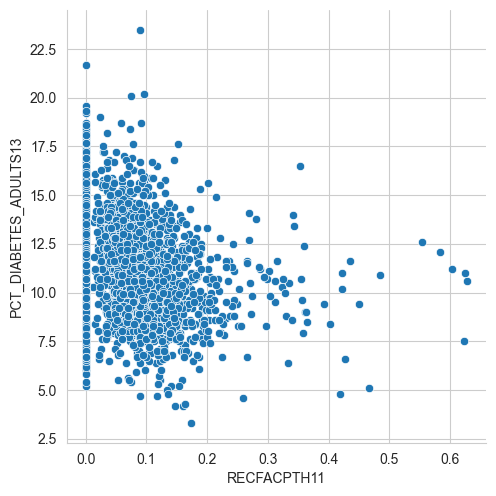

In [13]:
sns.pairplot(food_train,
                y_vars = ['PCT_DIABETES_ADULTS13'],
                x_vars = ['RECFACPTH11'],
                height = 5)

plt.show()

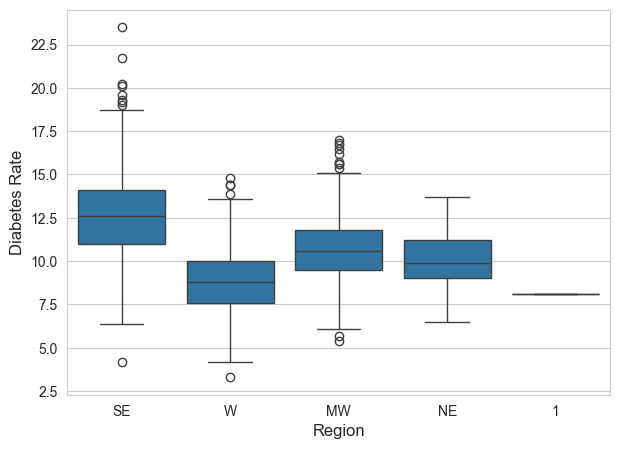

In [14]:
plt.figure(figsize=(7,5))

sns.boxplot(data = food_train,
               y = 'PCT_DIABETES_ADULTS13',
               x = 'region')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Diabetes Rate", fontsize=12)
plt.xlabel("Region", fontsize=12)

plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
food_train['South'] = pd.get_dummies(food_train['region'])['SE']
food_train['Northeast'] = pd.get_dummies(food_train['region'])['NE']
food_train['Midwest'] = pd.get_dummies(food_train['region'])['MW']

In [17]:
food_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2492 entries, 2887 to 1121
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   2492 non-null   int64  
 1   State                  2492 non-null   object 
 2   County                 2492 non-null   object 
 3   PCT_DIABETES_ADULTS13  2492 non-null   float64
 4   POVRATE15              2492 non-null   float64
 5   CHILDPOVRATE15         2492 non-null   float64
 6   MEDHHINC15             2492 non-null   float64
 7   PCT_LACCESS_LOWI10     2492 non-null   float64
 8   PCT_LACCESS_LOWI15     2492 non-null   float64
 9   PCT_DIABETES_ADULTS08  2492 non-null   float64
 10  GROCPTH11              2492 non-null   float64
 11  GROCPTH16              2492 non-null   float64
 12  FFRPTH11               2492 non-null   float64
 13  FFRPTH16               2492 non-null   float64
 14  FOODINSEC_12_14        2492 non-null   float64
 15  FOODIN

In [18]:
reg = LinearRegression(copy_X = True)

reg.fit(food_train[['POVRATE15','South','Northeast','Midwest']].values, food_train['PCT_DIABETES_ADULTS13'].values)


simplereg = LinearRegression(copy_X = True)

simplereg.fit(food_train[['POVRATE15']].values, food_train['PCT_DIABETES_ADULTS13'].values)

LinearRegression()

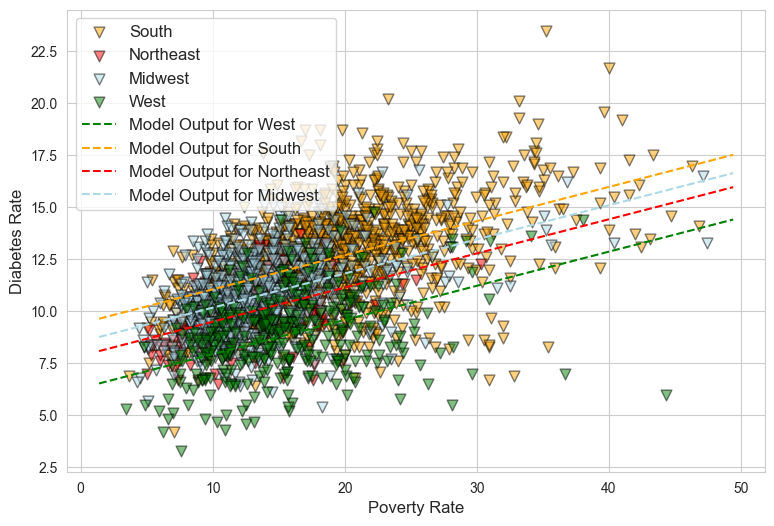

In [19]:
## This code plots that model with the training data ##

plt.figure(figsize=(9,6))

plt.scatter(food_train.loc[food_train.region=='SE'].POVRATE15,
               food_train.loc[food_train.region=='SE'].PCT_DIABETES_ADULTS13,
               label="South",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='orange')
plt.scatter(food_train.loc[food_train.region=='NE'].POVRATE15,
               food_train.loc[food_train.region=='NE'].PCT_DIABETES_ADULTS13,
               label="Northeast",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='red')
plt.scatter(food_train.loc[food_train.region=='MW'].POVRATE15,
               food_train.loc[food_train.region=='MW'].PCT_DIABETES_ADULTS13,
               label="Midwest",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='lightblue')
plt.scatter(food_train.loc[food_train.region=='W'].POVRATE15,
               food_train.loc[food_train.region=='W'].PCT_DIABETES_ADULTS13,
               label="West",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='green')
xs_w = np.zeros((1000,4))
xs_w[:,0] = np.linspace(food_train.POVRATE15.min()-2,
                    food_train.POVRATE15.max()+2,1000)

w_line = reg.predict(xs_w)


plt.plot(xs_w[:,0], w_line,
            '--', 
            c='green',
            linewidth=1.5,
            label="Model Output for West")

xs_se = np.zeros((1000,4))
xs_se[:,0] = np.linspace(food_train.POVRATE15.min()-2,
                    food_train.POVRATE15.max()+2,1000)
xs_se[:,1] = np.ones((1000,))

se_line = reg.predict(xs_se)


plt.plot(xs_se[:,0], se_line,
            '--', 
            c='orange',
            linewidth=1.5,
            label="Model Output for South")

xs_ne = np.zeros((1000,4))
xs_ne[:,0] = np.linspace(food_train.POVRATE15.min()-2,
                    food_train.POVRATE15.max()+2,1000)
xs_ne[:,2] = np.ones((1000,))

ne_line = reg.predict(xs_ne)


plt.plot(xs_ne[:,0], ne_line,
            '--', 
            c='red',
            linewidth=1.5,
            label="Model Output for Northeast")

xs_mw = np.zeros((1000,4))
xs_mw[:,0] = np.linspace(food_train.POVRATE15.min()-2,
                    food_train.POVRATE15.max()+2,1000)
xs_mw[:,3] = np.ones((1000,))

mw_line = reg.predict(xs_mw)


plt.plot(xs_mw[:,0], mw_line,
            '--', 
            c='lightblue',
            linewidth=1.5,
            label="Model Output for Midwest")

plt.xlabel("Poverty Rate", fontsize=12)
plt.ylabel("Diabetes Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

In [20]:
food_train[['POVRATE15','PCT_DIABETES_ADULTS13']].corr().values[0][1]

0.5302562209112603

In [21]:
ne_train = food_train.loc[food_train['region'] == 'NE']
se_train = food_train.loc[food_train['region'] == 'SE']
mw_train = food_train.loc[food_train['region'] == 'MW']
w_train = food_train.loc[food_train['region'] == 'W']

In [22]:
correlations = [ne_train[['POVRATE15','PCT_DIABETES_ADULTS13']].corr().values[0][1],se_train[['POVRATE15','PCT_DIABETES_ADULTS13']].corr().values[0][1],mw_train[['POVRATE15','PCT_DIABETES_ADULTS13']].corr().values[0][1],w_train[['POVRATE15','PCT_DIABETES_ADULTS13']].corr().values[0][1]]

In [23]:
type(ne_train[['POVRATE15','PCT_DIABETES_ADULTS13']].corr())

pandas.core.frame.DataFrame

In [24]:
pd.DataFrame({'region': ['NE','SE', 'MW', 'W'], 'Corr': correlations})

,region,Corr
0,NE,0.428467
1,SE,0.502499
2,MW,0.447011
3,W,0.329170


In [25]:
simpleresiduals = food_train['PCT_DIABETES_ADULTS13'].values - simplereg.predict(food_train['POVRATE15'].values.reshape(-1,1))

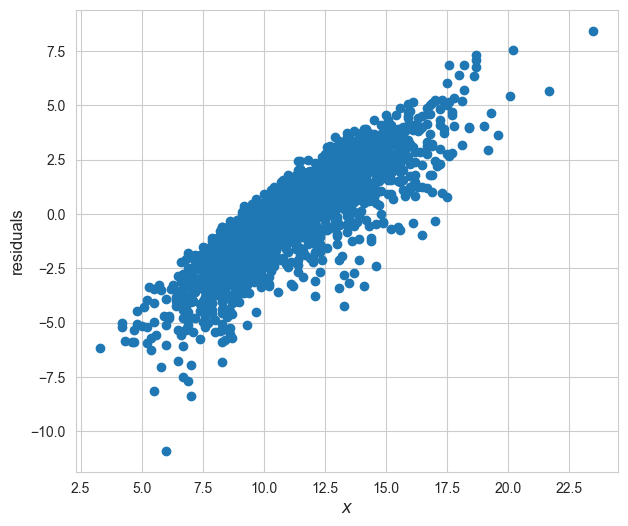

In [26]:
plt.figure(figsize=(7,6))

plt.scatter(food_train['PCT_DIABETES_ADULTS13'].values, simpleresiduals)

plt.xlabel("$x$", fontsize=12)
plt.ylabel("residuals", fontsize=12)


plt.show()

In [27]:
residuals = food_train['PCT_DIABETES_ADULTS13'].values - reg.predict(food_train[['POVRATE15','South','Northeast','Midwest']].values)

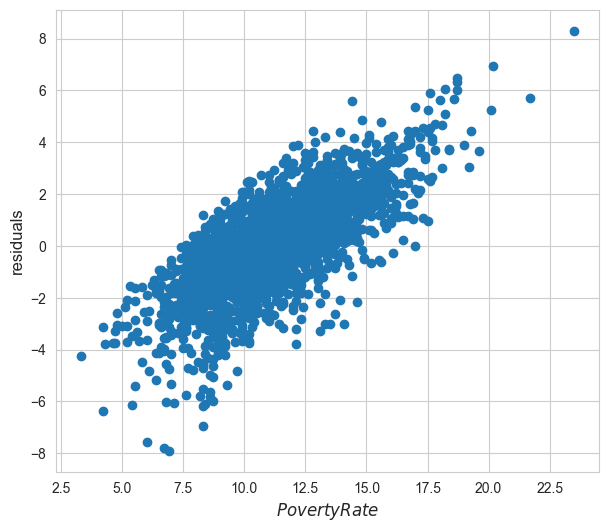

In [28]:
plt.figure(figsize=(7,6))

plt.scatter(food_train['PCT_DIABETES_ADULTS13'].values, residuals)

plt.xlabel("$Poverty Rate$", fontsize=12)
plt.ylabel("residuals", fontsize=12)


plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [30]:
models = {
    'lr': LinearRegression(),
    'svr': SVR(),
    'knr': KNeighborsRegressor(n_neighbors=10),
    'rf': RandomForestRegressor(),
    'ab': AdaBoostRegressor(),
    'gb': GradientBoostingRegressor(),
    'xbg': XGBRegressor()
}

In [31]:
food_train.head()

,FIPS,State,County,PCT_DIABETES_ADULTS13,POVRATE15,CHILDPOVRATE15,MEDHHINC15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCT_DIABETES_ADULTS08,...,FFRPTH16,FOODINSEC_12_14,FOODINSEC_15_17,RECFACPTH11,RECFACPTH16,log_medhhinc,region,South,Northeast,Midwest
2887,51141,VA,Patrick,12.5,17.0,25.5,37360.0,1.878976,4.701333,11.4,...,0.393945,12.6,9.8,0.054558,0.056278,4.572407,SE,True,False,False
245,8003,CO,Alamosa,6.7,24.0,30.2,40067.0,2.714643,2.624449,5.6,...,0.972290,13.6,9.2,0.186139,0.182304,4.602787,W,False,False,False
42,1085,AL,Lowndes,23.5,35.2,46.7,31117.0,26.219250,13.062145,17.1,...,0.097647,16.8,16.3,0.089847,0.097647,4.492998,SE,True,False,False
1308,26155,MI,Shiawassee,11.3,12.4,19.6,50807.0,7.027611,7.939921,9.4,...,0.612772,14.7,13.6,0.100050,0.087539,4.705924,MW,False,False,True
1647,30099,MT,Teton,8.8,12.4,19.9,47598.0,20.541559,12.671874,7.3,...,0.000000,11.5,11.4,0.330196,0.166334,4.677589,W,False,False,False


In [90]:
#features = food_train.columns[4:-4, ] 
features = (food_train.columns[4:9].tolist() + food_train.columns[10:19].tolist() +
                food_train.columns[-3:].tolist())
target = food_train.columns[3:4].tolist()

In [91]:
target

['PCT_DIABETES_ADULTS13']

In [92]:
features

['POVRATE15',
 'CHILDPOVRATE15',
 'MEDHHINC15',
 'PCT_LACCESS_LOWI10',
 'PCT_LACCESS_LOWI15',
 'GROCPTH11',
 'GROCPTH16',
 'FFRPTH11',
 'FFRPTH16',
 'FOODINSEC_12_14',
 'FOODINSEC_15_17',
 'RECFACPTH11',
 'RECFACPTH16',
 'log_medhhinc',
 'South',
 'Northeast',
 'Midwest']

In [64]:
## make a validation set
food_tt, food_val = train_test_split(food_train, 
                                                        shuffle=True,
                                                        random_state=216,
                                                        test_size=.2)

In [93]:
mses = {}
for name, model in models.items():
    model.fit(food_tt[features],food_tt[target])
    mses[name] = mean_squared_error(food_val[target], model.predict(food_val[features]))

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [66]:
mses

{'lr': 2.7042594598759715,
 'svr': 4.238945216940103,
 'knr': 4.679469739478957,
 'rf': 2.280870210420841,
 'ab': 2.871783254013665,
 'gb': 2.1301022815945228,
 'xbg': 2.2684818175709673}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": np.arange(100,800,100),
              "learning_rate": [0.01, 0.1, 1]}

In [69]:
xgb_reg = XGBRegressor()

In [71]:
search = GridSearchCV(xgb_reg, param_grid, cv=5).fit(food_train[features], food_train[target])

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [72]:
xgb_reg = XGBRegressor(**search.best_params_)

In [73]:
xgb_reg.fit(food_train[features], food_train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
food_test['region'] = 1

In [54]:
food_test.loc[food_test['State'].isin(northeast), 'region'] = 'NE'
food_test.loc[food_test['State'].isin(southeast), 'region'] = 'SE'
food_test.loc[food_test['State'].isin(midwest), 'region'] = 'MW'
food_test.loc[food_test['State'].isin(west), 'region'] = 'W'

In [56]:
food_test['South'] = pd.get_dummies(food_test['region'])['SE']
food_test['Northeast'] = pd.get_dummies(food_test['region'])['NE']
food_test['Midwest'] = pd.get_dummies(food_test['region'])['MW']

In [58]:
food_test['log_medhhinc'] = np.log10(food_test['MEDHHINC15'])

In [74]:
mean_squared_error(food_test[target],xgb_reg.predict(food_test[features]))

1.8038635739318634